In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

We previously talked about using Gradient Descent in order to optimize complex functions for which we have no analytical expression. Let's take a look at a few more examples.

## Paraboloid

Let's use this simple paraboloid to explore gradient descent algorithms. Notice that the curvature of this surface is much stronger in the y-dimension than in the x-dimension. This will lead to some interesting properties.

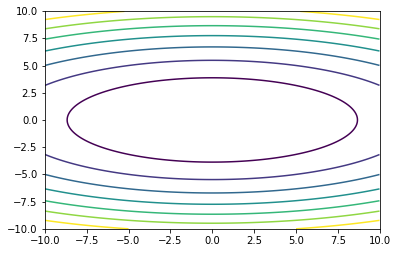

In [3]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = X**2 / 125 +  Y**2 / 25
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

In [12]:
def grad_f(vector):
    x, y = vector
    df_dx = (2/125)*x # Deviation of x => makeing vector going to the lowest point
    df_dy = (2/25)*y  # Deviation of y
    return np.array([df_dx, df_dy])

In [5]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

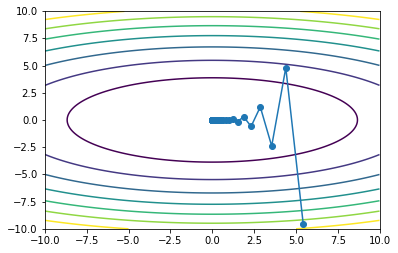

In [6]:
np.random.seed(10)
traj = grad_descent(iterations=50)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Exercise
 Take a look at what happens when the learning rate is low, such as around 1. What happens when the learning rate is much smaller than 1? What is the downside of making the learning rate too small?
 
 Take a look at what happens when the learning rate is higher, like 10 to 15. 
 

## Momentum

When the curvature of the loss fuction is much higher in one dimension than in the other(s), gradient descent has some drawbacks. The gradient is much stronger in one of the dimensions and this dominates where the next step goes. Unfortunately, we have a tendency to over-step in this direction and we have to then walk back down the hill in the next step. The oscillatory behavior is wasteful, and at the same time, we move only very very slowly in the other dimension. 

There are a family of methods that seek to overcome this problem by utilizing not just the instantaeous gradient information, but also some information about the past of the trajectory. Gradient Descent with Momentum is the simplest of these and the one which we will explore here. Yet other methods also include adaptive learning rate by considering the curvature in each dimension of the loss function: AdaGrad, RMSprop, and Adam.

In [47]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point.any():
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

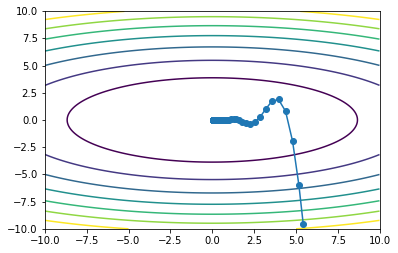

In [10]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=3, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Exercise
(Make sure to set random seeds for better comparisons.)

Explore the Momentum algorithm with different values of epsilon. Try epsilson near 1 and near 10, see if the oscillatory before we saw before seems more dampened.

What effects do you notice of exploring different values of alpha, such as .5, .9, .99 and so on.

Make comparisons between gradient descent from the same starting point, with and without momentum. Make sure the "learning_rate" and "epsilon" are the same, respectively. How does alpha impact this comparison?


In [52]:
sp = np.random.uniform(-10,10,size=2)

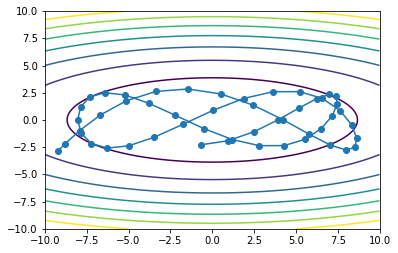

In [53]:
traj = grad_descent_with_momentum(starting_point=sp, iterations=50, epsilon=3, alpha=.99)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

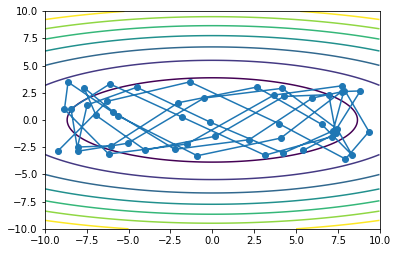

In [54]:
traj = grad_descent_with_momentum(starting_point=sp, iterations=50, epsilon=20, alpha=.99)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

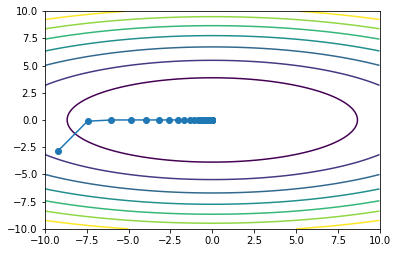

In [57]:
traj = grad_descent_with_momentum(starting_point=sp, iterations=50, epsilon=12, alpha=.0)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

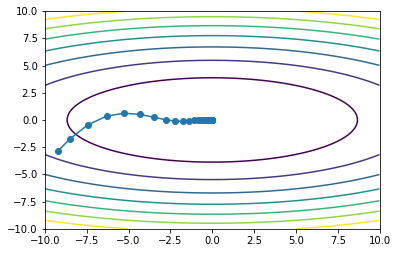

In [59]:
traj = grad_descent_with_momentum(starting_point=sp, iterations=50, epsilon=5, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')